In [1]:
import pandas as pd

sle_pro_cox = pd.read_csv("/Volumes/data_files/UKB_data/immune_result/cox3/sle_pro_cox.csv")
sle_pro_5_cox = pd.read_csv("/Volumes/data_files/UKB_data/immune_result/cox3/sle_pro_5_cox.csv")
sle_pro_10_cox = pd.read_csv("/Volumes/data_files/UKB_data/immune_result/cox3/sle_pro_10_cox.csv")
sle_pro_15_cox = pd.read_csv("/Volumes/data_files/UKB_data/immune_result/cox3/sle_pro_15_cox.csv")

In [2]:
# sle_pro_cox = sle_pro_cox[sle_pro_cox['Bonferroni']<0.05]
# sle_pro_5_cox = sle_pro_5_cox[sle_pro_5_cox['Bonferroni']<0.05]
# sle_pro_10_cox = sle_pro_10_cox[sle_pro_10_cox['Bonferroni']<0.05]
# sle_pro_15_cox = sle_pro_15_cox[sle_pro_15_cox['Bonferroni']<0.05]


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from adjustText import adjust_text

def plot_volcano(data, hr_col='HR', p_col='Bonferroni', feature_col='Feature',
                 top_n=20, fdr_threshold=0.01, title='Volcano Plot',
                 x_label='log2(Hazard Ratio)', y_label='-log10(P-value)'):

    # 计算-log10(P-value)并标记显著性
    data['-log10(P-value)'] = -np.log10(data[p_col])
    data['Significance'] = 'Not Significant'
    data.loc[(data[p_col] < fdr_threshold) & (data[hr_col] > 1), 'Significance'] = 'Positive Correlation'
    data.loc[(data[p_col] < fdr_threshold) & (data[hr_col] < 1), 'Significance'] = 'Negative Correlation'

    # 计算log2(HR)
    data['log2(HR)'] = np.log2(data[hr_col])

    # 绘制散点图
    plt.figure(figsize=(6,6))
    sns.scatterplot(
        data=data,
        x='log2(HR)',  # 使用log2(HR)作为X轴
        y='-log10(P-value)',
        hue='Significance',
        palette={
            'Positive Correlation': 'tomato',
            'Negative Correlation': 'dodgerblue',
            'Not Significant': 'gray'
        },
        alpha=0.7
    )

    # 添加显著性阈值线
    plt.axhline(-np.log10(fdr_threshold), color='gray', linestyle='--', linewidth=1, label=f'P-value = {fdr_threshold}')
    plt.axvline(0, color='gray', linestyle='--', linewidth=1, label='log2(HR) = 0')

    # 标注正相关和负相关的显著点
    top_positive = data[data['Significance'] == 'Positive Correlation'].nlargest(top_n, '-log10(P-value)')
    top_negative = data[data['Significance'] == 'Negative Correlation'].nlargest(top_n, '-log10(P-value)')

    texts = []
    for i, row in top_positive.iterrows():
        texts.append(plt.text(row['log2(HR)'], row['-log10(P-value)'], row[feature_col], fontsize=12, color='black', ha='right'))
    for i, row in top_negative.iterrows():
        texts.append(plt.text(row['log2(HR)'], row['-log10(P-value)'], row[feature_col], fontsize=12, color='black', ha='right'))

    # 调整文本以避免重叠
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

    # 图形美化
    # plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)

    # 图形布局调整
    plt.grid(alpha=0.3)
    plt.tight_layout()

    # 显示图像
    plt.savefig("Volcano_plot.pdf",format='pdf')

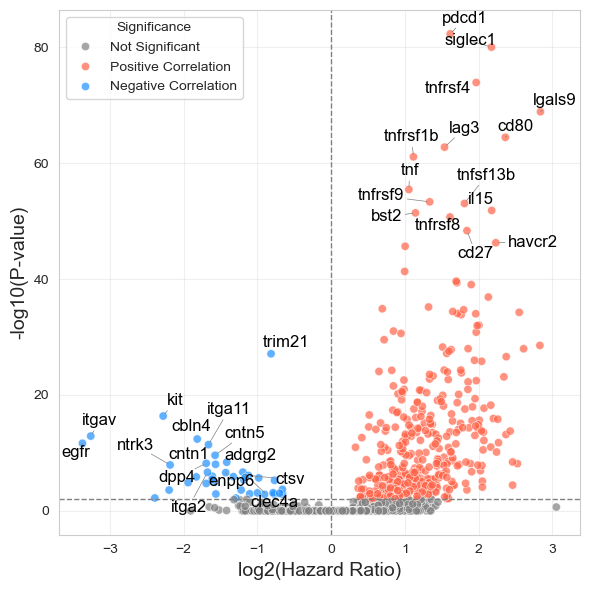

In [20]:
plot_volcano(sle_pro_cox, hr_col='HR', p_col='Bonferroni', feature_col='Feature', top_n=15, title='Volcano Plot of SLE')